# Week 9-1: Unsupervised Machine Learning

PR9-1: Great Outdoors wil graag weten in welke segmenten verkoopafdelingen (‘sales_branches’) opgedeeld kan worden. Er bestaan al retailersegmenten (table ‘retailer_segment’), Great Outdoors wil dus óók segmenten creëren voor verkoopafdelingen.

* Pas waar nodig Dummy Encoding toe.
* Train het initiële clustermodel.
* Experimenteer met meerdere k’s door het berekenen van de inter- en intraclusterafstand.
* Gebruik dit <u>script</u> dat <u>deze dataset</u> inleest als inspiratie

## Bibliotheken importeren

Hier importeren we de libraries die we gaan gebruiken voor deze opdracht.

In [33]:
import pandas as pd
from sklearn.cluster import KMeans
import math
import matplotlib.pyplot as plt

import warnings as warn
import sqlite3 as sql
import numpy as np
from typing import Literal, Any

warn.simplefilter("ignore")

## Data inlezen en kolommen selecteren

Hier pakken we de gegevens die we nodig hebben voor deze opdracht, lezen we de bestanden in en selecteren we de tabellen.

In [34]:
# order_header = pd.read_sql("SELECT * FROM order_header", conn)
# order_details = pd.read_sql("SELECT * FROM order_details", conn)
# product = pd.read_sql("SELECT * FROM product", conn)
# product_type = pd.read_sql("SELECT * FROM product_type", conn)
# product_line = pd.read_sql("SELECT * FROM product_line", conn) # sales_branch = pd.read_sql("SELECT * FROM sales_branch", conn)
# country = pd.read_sql("SELECT * FROM country", conn)

# data = pd.merge(order_header, order_details, on="ORDER_NUMBER")
# data = pd.merge(data, product, on="PRODUCT_NUMBER")
# data = pd.merge(data, product_type, on="PRODUCT_TYPE_CODE")
# data = pd.merge(data, product_line, on="PRODUCT_LINE_CODE")
# data = pd.merge(data, sales_branch, on="SALES_BRANCH_CODE")
# data = pd.merge(data, country, on="COUNTRY_CODE")

In [35]:
conn = sql.connect("Great_Outdoors_Data_SQLite/go_sales.sqlite")
sales_branch = pd.read_sql("SELECT * FROM sales_branch", conn)
df = sales_branch
df

,SALES_BRANCH_CODE,ADDRESS1,ADDRESS2,CITY,REGION,POSTAL_ZONE,COUNTRY_CODE,TRIAL888
0,13,Schwabentor 35,None,Hamburg,None,D-22529,2,T
1,14,Leopoldstraße 36,None,München,None,D-81241,2,T
2,15,Isafjordsgatan 30 C,None,Kista,None,S-164 40,10,T
3,17,"7800, 756 - 6th Avenue. S.W.",None,Calgary,Alberta,T2P 3Z0,4,T
4,18,789 Yonge Street,None,Toronto,Ontario,M2M 4K8,4,T
5,19,1288 Dorchester Avenue,None,Boston,Massachusetts,02133,3,T
6,20,299 Yale Avenue,None,Seattle,Washington,98139,3,T
7,21,1288 South Barrington Ave.,None,Los Angeles,California,90072,3,T
8,22,10032 NW 186th,None,Miami,Florida,33024,3,T
9,23,"6c, rue de l'Église",None,Lyon,None,F-69002,1,T


## Dropping unnecessary columns

We verwijderen de kolommen die we niet nodig hebben, nadat we sales_branch in data hebben gestopt.

In [36]:
# df = df.drop_duplicates(["SALES_BRANCH_CODE"])
# df = df.loc[:, ["PRODUCT_LINE_CODE", "COUNTRY", "CITY", "SALES_BRANCH_CODE"]]
df = df.drop(["ADDRESS1", "ADDRESS2", "POSTAL_ZONE"], axis=1)
df = df[df.columns.drop(list(df.filter(regex="TRIAL")))]
df

,SALES_BRANCH_CODE,CITY,REGION,COUNTRY_CODE
0,13,Hamburg,None,2
1,14,München,None,2
2,15,Kista,None,10
3,17,Calgary,Alberta,4
4,18,Toronto,Ontario,4
5,19,Boston,Massachusetts,3
6,20,Seattle,Washington,3
7,21,Los Angeles,California,3
8,22,Miami,Florida,3
9,23,Lyon,None,1


## One-hot encoding van onafhankelijke niet-numerieke variabelen

Hier maken we dummies van onafhankelijke niet-numerieke variabelen en tonen dit weer op het scherm. We gebruiken One-hot encoding hiervoor.

In [37]:
# Show all the columns
pd.set_option("display.max_columns", None)

dummies = pd.get_dummies(df.loc[:,["CITY", "REGION"]])
dummies

,CITY_Amsterdam,CITY_Bilbao,CITY_Birmingham,CITY_Boston,CITY_Calgary,CITY_Distrito Federal,CITY_Hamburg,CITY_Heverlee,CITY_Kista,CITY_Kuopio,CITY_London,CITY_Los Angeles,CITY_Lyon,CITY_Melbourne,CITY_Miami,CITY_Milano,CITY_München,CITY_Osaka City,CITY_Paris,CITY_San Chung,CITY_Seattle,CITY_Seoul,CITY_Shanghai,CITY_São Paulo,CITY_Tokyo,CITY_Toronto,CITY_Wien,CITY_Zürich,REGION_Alberta,REGION_California,REGION_Florida,REGION_Massachusetts,REGION_México,REGION_Noord-Holland,REGION_Ontario,REGION_Osaka,REGION_SP,REGION_Taipei,REGION_Tokyo,REGION_VIC,REGION_Vizcaya,REGION_Washington,REGION_West Midlands
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
5,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
7,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Concat the dummies with the actual data

We voegen de dummies met de data samen tot een volledig geheel.

In [38]:
df = pd.concat([df, dummies], axis=1)
# df.drop(["COUNTRY", "CITY"], axis=1, inplace=True)
df

,SALES_BRANCH_CODE,CITY,REGION,COUNTRY_CODE,CITY_Amsterdam,CITY_Bilbao,CITY_Birmingham,CITY_Boston,CITY_Calgary,CITY_Distrito Federal,CITY_Hamburg,CITY_Heverlee,CITY_Kista,CITY_Kuopio,CITY_London,CITY_Los Angeles,CITY_Lyon,CITY_Melbourne,CITY_Miami,CITY_Milano,CITY_München,CITY_Osaka City,CITY_Paris,CITY_San Chung,CITY_Seattle,CITY_Seoul,CITY_Shanghai,CITY_São Paulo,CITY_Tokyo,CITY_Toronto,CITY_Wien,CITY_Zürich,REGION_Alberta,REGION_California,REGION_Florida,REGION_Massachusetts,REGION_México,REGION_Noord-Holland,REGION_Ontario,REGION_Osaka,REGION_SP,REGION_Taipei,REGION_Tokyo,REGION_VIC,REGION_Vizcaya,REGION_Washington,REGION_West Midlands
0,13,Hamburg,None,2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,14,München,None,2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,15,Kista,None,10,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,17,Calgary,Alberta,4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,18,Toronto,Ontario,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
5,19,Boston,Massachusetts,3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
6,20,Seattle,Washington,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
7,21,Los Angeles,California,3,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
8,22,Miami,Florida,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
9,23,Lyon,None,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Clusteringmodel with 2 dimension and making clusters to find the right K

Hier gaan we een clusteringmodel maken met 2 dimensies waar we de clusters bepalen. We passen het aantal clusters aan om de juiste K waarde te kunnen vinden en het clusteringmodel te kunnen trainen.

In [39]:
df_2d = dummies
kmeans: KMeans = KMeans(n_clusters=6, random_state=42)
pred_results = kmeans.fit_predict(df_2d)

## Convert KMeans to DataFrame and take the center

We zetten de KMeans naar een DataFrame om en tonen dit op het scherm. Daarna pakken we het centrum van de cluster.

In [40]:
kmeans_center = pd.DataFrame(kmeans.cluster_centers_)
kmeans_center

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
1,6.938894e-18,0.043478,0.043478,0.043478,0.043478,6.938894e-18,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,6.938894e-18,0.043478,0.043478,6.938894e-18,0.043478,6.938894e-18,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,6.938894e-18,6.938894e-18,6.938894e-18,0.043478,6.938894e-18,0.043478,0.043478,0.043478,0.043478,6.938894e-18,0.043478
2,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
3,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
4,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
5,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000


## Rename all the columns for the dummies

Hier hernoemen we alle dummies kolommen die we gebruiken voor het cluster.

In [41]:
for i in range(len(kmeans_center.columns)):
    kmeans_center = kmeans_center.rename(columns={i : f"{df_2d.columns[i]}"})
    
kmeans_center

,CITY_Amsterdam,CITY_Bilbao,CITY_Birmingham,CITY_Boston,CITY_Calgary,CITY_Distrito Federal,CITY_Hamburg,CITY_Heverlee,CITY_Kista,CITY_Kuopio,CITY_London,CITY_Los Angeles,CITY_Lyon,CITY_Melbourne,CITY_Miami,CITY_Milano,CITY_München,CITY_Osaka City,CITY_Paris,CITY_San Chung,CITY_Seattle,CITY_Seoul,CITY_Shanghai,CITY_São Paulo,CITY_Tokyo,CITY_Toronto,CITY_Wien,CITY_Zürich,REGION_Alberta,REGION_California,REGION_Florida,REGION_Massachusetts,REGION_México,REGION_Noord-Holland,REGION_Ontario,REGION_Osaka,REGION_SP,REGION_Taipei,REGION_Tokyo,REGION_VIC,REGION_Vizcaya,REGION_Washington,REGION_West Midlands
0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
1,6.938894e-18,0.043478,0.043478,0.043478,0.043478,6.938894e-18,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,6.938894e-18,0.043478,0.043478,6.938894e-18,0.043478,6.938894e-18,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,6.938894e-18,6.938894e-18,6.938894e-18,0.043478,6.938894e-18,0.043478,0.043478,0.043478,0.043478,6.938894e-18,0.043478
2,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
3,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
4,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
5,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000


## Calculate Euclidean distance

We berekenen hier de euclidische afstand, waardoor we weten wat het verschil is tussen de interclusterafstand en de intraclusterafstand.

In [42]:
for index, _ in df_2d.iterrows():
    euclidean_distance: dict = dict()
    print(f"Afstand van bronindex {index} tot...")

    for centrumindex, _ in kmeans_center.iterrows():
        print(f"\tCentrumindex {centrumindex}:")
        euclidean_sum: Literal[0] = 0

        for column in kmeans_center.columns:
            difference: Any = df_2d.at[index, column] - kmeans_center.at[centrumindex, column]
            print(f"\t\t{df_2d.at[index, column]} - {kmeans_center.at[centrumindex, column]} = {difference}")
            euclidean_sum += difference ** 2
        
        print(f"\tTotale euclidische som: {euclidean_sum}")
        distance: float = math.sqrt(euclidean_sum)
        print(f"\tEuclidische afstand: {distance}")
        euclidean_distance[centrumindex]: dict = distance
        print("------------------------------------------------")
    
    print(euclidean_distance)
    centrum_number: Any = min(euclidean_distance, key = euclidean_distance.get)
    print(centrum_number)
    df_2d.at[index, "Centrum"] = centrum_number
    print("================================================")

df_2d

Afstand van bronindex 0 tot...
	Centrumindex 0:
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 1.0 = -1.0
		True - 0.0 = 1.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 1.0 = -1.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
	Totale euclidische som: 3.0
	Euclidische afstand: 1.7320508075688772
---------------------

		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
	Totale euclidische som: 3.0
	Euclidische afstand: 1.7320508075688772
------------------------------------------------
	Centrumindex 1:
		False - 6.938893903907228e-18 = -6.938893903907228e-18
		False - 0.04347826086956523 = -0.04347826086956523
		False - 0.04347826086956523 = -0.04347826086956523
		False - 0.04347826086956523 = -0.04347826086956523
		False - 0.04347826086956523 = -0.04347826086956523
		False - 6.938893903907228e-18 = -6.938893903907228e-18
		False - 0.04347826086956523 = -0.04347826086956523
		False - 0.04347826086956523 = -0.04347826086956523
		False - 0.04347826086956523 = -0.04347826086956523
		False - 0.04347826086956523 = -0.04347826086956523
		False - 0.04347826086956523 = -0.04347826086956523
		False - 0.04347826086956523 = -0.04347826086956523
		False - 0.04347826086956523 = -0.04347826086956523
		False - 0.04347826086956523 = -0.04347826086956523
		False - 0.04

,CITY_Amsterdam,CITY_Bilbao,CITY_Birmingham,CITY_Boston,CITY_Calgary,CITY_Distrito Federal,CITY_Hamburg,CITY_Heverlee,CITY_Kista,CITY_Kuopio,CITY_London,CITY_Los Angeles,CITY_Lyon,CITY_Melbourne,CITY_Miami,CITY_Milano,CITY_München,CITY_Osaka City,CITY_Paris,CITY_San Chung,CITY_Seattle,CITY_Seoul,CITY_Shanghai,CITY_São Paulo,CITY_Tokyo,CITY_Toronto,CITY_Wien,CITY_Zürich,REGION_Alberta,REGION_California,REGION_Florida,REGION_Massachusetts,REGION_México,REGION_Noord-Holland,REGION_Ontario,REGION_Osaka,REGION_SP,REGION_Taipei,REGION_Tokyo,REGION_VIC,REGION_Vizcaya,REGION_Washington,REGION_West Midlands,Centrum
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.0
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.0
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.0
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.0
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,2.0
5,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,1.0
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,5.0
7,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,1.0
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,1.0
9,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.0


## Plot to show the clusters

Hier tonen we een plot van de clusters.

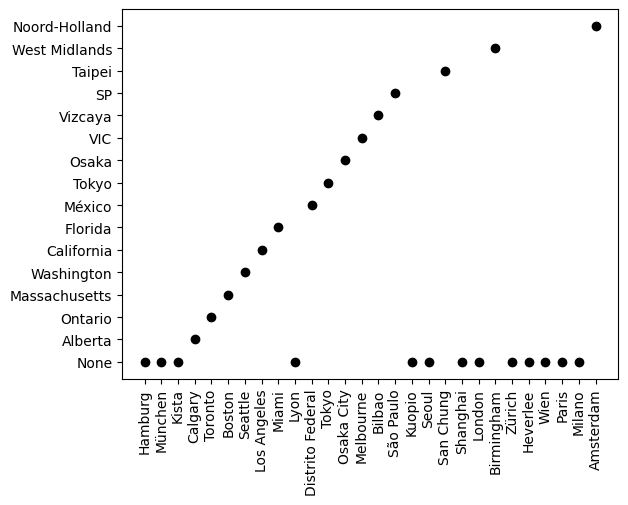

In [43]:
plt.scatter(df["CITY"].astype(str), df["REGION"].astype(str), color="k")
plt.xticks(rotation=90)
plt.show()

## Check the center and group it

We checken het centrum, groeperen deze en tellen deze op.

In [44]:
df_2d.groupby("Centrum", as_index=False)["Centrum"].count()

,Centrum
0,1
1,23
2,1
3,1
4,1
5,1


## Take the center

We gooien de voorspellingen in het centrum en tonen dit op het scherm.

In [45]:
df["Centrum"] = pred_results
df

,SALES_BRANCH_CODE,CITY,REGION,COUNTRY_CODE,CITY_Amsterdam,CITY_Bilbao,CITY_Birmingham,CITY_Boston,CITY_Calgary,CITY_Distrito Federal,CITY_Hamburg,CITY_Heverlee,CITY_Kista,CITY_Kuopio,CITY_London,CITY_Los Angeles,CITY_Lyon,CITY_Melbourne,CITY_Miami,CITY_Milano,CITY_München,CITY_Osaka City,CITY_Paris,CITY_San Chung,CITY_Seattle,CITY_Seoul,CITY_Shanghai,CITY_São Paulo,CITY_Tokyo,CITY_Toronto,CITY_Wien,CITY_Zürich,REGION_Alberta,REGION_California,REGION_Florida,REGION_Massachusetts,REGION_México,REGION_Noord-Holland,REGION_Ontario,REGION_Osaka,REGION_SP,REGION_Taipei,REGION_Tokyo,REGION_VIC,REGION_Vizcaya,REGION_Washington,REGION_West Midlands,Centrum
0,13,Hamburg,None,2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1
1,14,München,None,2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1
2,15,Kista,None,10,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1
3,17,Calgary,Alberta,4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1
4,18,Toronto,Ontario,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,2
5,19,Boston,Massachusetts,3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,1
6,20,Seattle,Washington,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,5
7,21,Los Angeles,California,3,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,1
8,22,Miami,Florida,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,1
9,23,Lyon,None,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1


## De juiste centra toewijzen aan rijen uit de dataset

Wederom pakken we het centrum, groeperen deze en tellen vervolgens hoeveel connecties het heeft.

In [46]:
df.groupby("Centrum", as_index=False)["Centrum"].count()

,Centrum
0,1
1,23
2,1
3,1
4,1
5,1


## Evalueren

We evalueren en berekenen de interclusterafstand/intraclusterafstand.

In [47]:
intercluster_distance: Literal[0] = 0
intracluster_distance: Literal[0] = 0

common_columns: Any = df_2d.columns.intersection(kmeans_center.columns)

for centrumindex, _ in kmeans_center[common_columns].iterrows():
    for src_index, _ in df_2d[common_columns].iterrows():
        if df_2d.at[src_index, "Centrum"] == centrumindex:
            diff = df_2d.loc[src_index, common_columns] - kmeans_center.loc[centrumindex, common_columns]
            distance = np.linalg.norm(diff[pd.to_numeric(diff, errors="coerce").notnull()])
            intracluster_distance += distance
        else:
            diff = df_2d.loc[src_index, common_columns] - kmeans_center.loc[centrumindex, common_columns]
            distance = np.linalg.norm(diff[pd.to_numeric(diff, errors="coerce").notnull()])
            intercluster_distance += distance

print(f"Intercluster distance (more is better): {intercluster_distance}")
print(f"Intracluster distance (less is better): {intracluster_distance}")

Intercluster distance (more is better): 259.7638001288958
Intracluster distance (less is better): 26.581428111617235


## Plot for different distance for the clusters as K

Hier hebben we een plot om de verschillende clusters in een grafiek te zien voor de k-clusters.

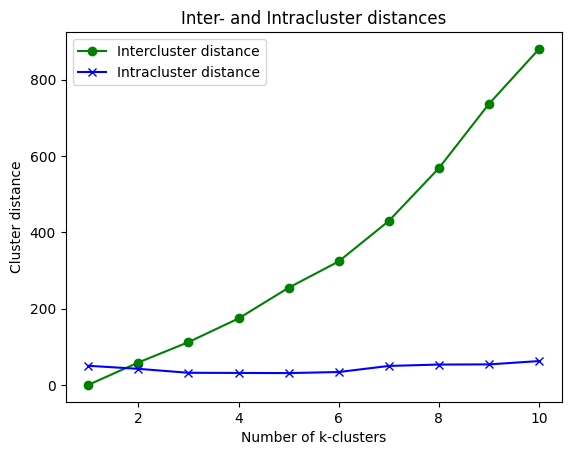

In [48]:
intercluster_distances: list = []
intracluster_distances: list = []
k_options = range(1, 11)

for k in k_options:
    kmeans: KMeans = KMeans(n_clusters=k, random_state=42)
    df_2d["Centrum"] = kmeans.fit_predict(df_2d)
    kmeans_center = pd.DataFrame(kmeans.cluster_centers_, columns=df_2d.columns)
    
    intercluster_distance: Literal[0] = 0
    intracluster_distance: Literal[0] = 0

    common_columns: Any = df_2d.columns.intersection(kmeans_center.columns)

    for centrumindex, _ in kmeans_center[common_columns].iterrows():
        for src_index, _ in df_2d[common_columns].iterrows():
            if df_2d.at[src_index, "Centrum"] == centrumindex:
                diff = df_2d.loc[src_index, common_columns] - kmeans_center.loc[centrumindex, common_columns]
                distance = np.linalg.norm(diff[pd.to_numeric(diff, errors="coerce").notnull()])
                intracluster_distance += distance
            else:
                diff = df_2d.loc[src_index, common_columns] - kmeans_center.loc[centrumindex, common_columns]
                distance = np.linalg.norm(diff[pd.to_numeric(diff, errors="coerce").notnull()])
                intercluster_distance += distance

    intercluster_distances.append(intercluster_distance)
    intracluster_distances.append(intracluster_distance)

plt.plot(k_options, intercluster_distances, marker="o", label="Intercluster distance", color="g")
plt.plot(k_options, intracluster_distances, marker="x", label="Intracluster distance", color="b")
plt.xlabel("Number of k-clusters")
plt.ylabel("Cluster distance")
plt.title("Inter- and Intracluster distances")
plt.legend()
plt.show()

## Conclusie doorvoeren

Op basis van de bovenstaande grafiek concluderen wij dat 6 clusters ideaal is. Daarna gaat namelijk de intraclusterafstand omhoog, wat we niet willen.